##  Bank Marketing


**Abstract:** 
The data is related with direct marketing campaigns (phone calls) of a Portuguese banking institution. The classification goal is to predict if the client will subscribe to a term deposit account (dependent variable y).

**Data Set Information:**
The data is related with direct marketing campaigns of a Portuguese banking institution. The marketing campaigns were based on phone calls. Often, more than one contact to the same client was required, in order to access if the product (bank term deposit) would be ('yes') or not ('no') subscribed. 

## Project Description:
The project (Code) analyzes the prior marketing campaign data of a Portugeuse bank and aims to predict whether the customer will subscribe to fixed-term deposit products the bank is offering. The code cleans the data, imputes the missing values, and analyzes and compares different predictive models. The best predictive model is used for the prediction exercise.

Comments and Explanations (in the form of Markdown) are included in the notebook to improve the readability of the code, to explain the rationale of doing certain steps and to discuss the results and inferences from the executed code.


###  Attribute Information:

####  Bank client data:

 - Age (numeric)
 - Job : type of job (categorical: 'admin.', 'blue-collar', 'entrepreneur', 'housemaid', 'management', 'retired', 'self-employed', 'services', 'student', 'technician', 'unemployed', 'unknown')
 - Marital : marital status (categorical: 'divorced', 'married', 'single', 'unknown' ; note: 'divorced' means divorced or widowed)
 - Education (categorical: 'basic.4y', 'basic.6y', 'basic.9y', 'high.school',  'illiterate', 'professional.course', 'university.degree', 'unknown')
 - Default: has credit in default? (categorical: 'no', 'yes', 'unknown')
 - Housing: has housing loan? (categorical: 'no', 'yes', 'unknown')
 - Loan: has personal loan? (categorical: 'no', 'yes', 'unknown')

    
####  Related with the last contact of the current campaign:

 - Contact: contact communication type (categorical:
   'cellular','telephone')
 - Month: last contact month of year (categorical: 'jan', 'feb', 'mar',
   ..., 'nov', 'dec')
 - Day_of_week: last contact day of the week (categorical:
   'mon','tue','wed','thu','fri')
 - Duration: last contact duration, in seconds (numeric). BE VERY CAREFUL WITH THIS FIELD. Important
   note: this attribute highly affects the output target (e.g., if
   duration=0 then y='no'). Yet, the duration is not known before a call
   is performed. Also, after the end of the call y is obviously known.
   Thus, this input should only be included for benchmark purposes and
   should be discarded if the intention is to have a realistic
   predictive model.

    
####  Other attributes:

 - Campaign: number of contacts performed during this campaign and for
   this client (numeric, includes last contact)
 - Pdays: number of days that passed by after the client was last
   contacted from a previous campaign (numeric; 999 means client was not
   previously contacted)
 - Previous: number of contacts performed before this campaign and for
   this client (numeric)
 - Poutcome: outcome of the previous marketing campaign (categorical:
   'failure','nonexistent','success')

    
####  Social and economic context attributes
 - Emp.var.rate: employment variation rate - quarterly indicator
   (numeric)
 - Cons.price.idx: consumer price index - monthly indicator (numeric)
 - Cons.conf.idx: consumer confidence index - monthly indicator
   (numeric)
 - Euribor3m: euribor 3 month rate - daily indicator (numeric)
 - Nr.employed: number of employees - quarterly indicator (numeric)

####  Output variable (desired target):

 - y - has the client subscribed a term deposit? (binary: 'yes', 'no')

     
###  Source:

 - Dataset from : http://archive.ics.uci.edu/ml/datasets/Bank+Marketing#


In [1]:
from datetime import datetime
start_time = datetime.now()

# Libraries to install
# %pip install xgboost
# %pip install plotnine
# %pip install mlxtend

from plotnine import *
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline
import warnings
warnings.filterwarnings('ignore')

print('LOAD DURATION: ', datetime.now() - start_time) # load time about a minute

LOAD DURATION:  0:00:02.547205


In [2]:
data = pd.read_csv('bank-additional-full.csv', sep = ';')
data.head(10)

,age,job,marital,education,default,housing,loan,contact,month,day_of_week,...,campaign,pdays,previous,poutcome,emp.var.rate,cons.price.idx,cons.conf.idx,euribor3m,nr.employed,y
0,56,housemaid,married,basic.4y,no,no,no,telephone,may,mon,...,1,999,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,no
1,57,services,married,high.school,unknown,no,no,telephone,may,mon,...,1,999,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,no
2,37,services,married,high.school,no,yes,no,telephone,may,mon,...,1,999,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,no
3,40,admin.,married,basic.6y,no,no,no,telephone,may,mon,...,1,999,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,no
4,56,services,married,high.school,no,no,yes,telephone,may,mon,...,1,999,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,no
5,45,services,married,basic.9y,unknown,no,no,telephone,may,mon,...,1,999,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,no
6,59,admin.,married,professional.course,no,no,no,telephone,may,mon,...,1,999,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,no
7,41,blue-collar,married,unknown,unknown,no,no,telephone,may,mon,...,1,999,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,no
8,24,technician,single,professional.course,no,yes,no,telephone,may,mon,...,1,999,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,no
9,25,services,single,high.school,no,yes,no,telephone,may,mon,...,1,999,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,no


In [3]:
# take a look at the type, number of columns, entries, null values etc..
data.info()
# bank.isnull().any() # one way to search for null values

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 41188 entries, 0 to 41187
Data columns (total 21 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   age             41188 non-null  int64  
 1   job             41188 non-null  object 
 2   marital         41188 non-null  object 
 3   education       41188 non-null  object 
 4   default         41188 non-null  object 
 5   housing         41188 non-null  object 
 6   loan            41188 non-null  object 
 7   contact         41188 non-null  object 
 8   month           41188 non-null  object 
 9   day_of_week     41188 non-null  object 
 10  duration        41188 non-null  int64  
 11  campaign        41188 non-null  int64  
 12  pdays           41188 non-null  int64  
 13  previous        41188 non-null  int64  
 14  poutcome        41188 non-null  object 
 15  emp.var.rate    41188 non-null  float64
 16  cons.price.idx  41188 non-null  float64
 17  cons.conf.idx   41188 non-null 

In [4]:
print("Rows     : ", data.shape[0])
print("Columns  : ", data.shape[1])
print("\nFeatures : \n", data.columns.tolist())
print("\nMissing values : \n" , data.isnull().sum())
print("\nUnique values   : ", data.nunique())

Rows     :  41188
Columns  :  21

Features : 
 ['age', 'job', 'marital', 'education', 'default', 'housing', 'loan', 'contact', 'month', 'day_of_week', 'duration', 'campaign', 'pdays', 'previous', 'poutcome', 'emp.var.rate', 'cons.price.idx', 'cons.conf.idx', 'euribor3m', 'nr.employed', 'y']

Missing values : 
 age               0
job               0
marital           0
education         0
default           0
housing           0
loan              0
contact           0
month             0
day_of_week       0
duration          0
campaign          0
pdays             0
previous          0
poutcome          0
emp.var.rate      0
cons.price.idx    0
cons.conf.idx     0
euribor3m         0
nr.employed       0
y                 0
dtype: int64

Unique values   :  age                 78
job                 12
marital              4
education            8
default              3
housing              3
loan                 3
contact              2
month               10
day_of_week          5
durat

In [5]:
pd.set_option('display.float_format',lambda x : '%.2f' % x)

In [6]:
cat_cols = list(data.select_dtypes(include = ['object']).columns)
cat_cols

['job',
 'marital',
 'education',
 'default',
 'housing',
 'loan',
 'contact',
 'month',
 'day_of_week',
 'poutcome',
 'y']

In [7]:
num_cols = list(data.drop(columns = cat_cols).columns)
num_cols

['age',
 'duration',
 'campaign',
 'pdays',
 'previous',
 'emp.var.rate',
 'cons.price.idx',
 'cons.conf.idx',
 'euribor3m',
 'nr.employed']

In [8]:
len(num_cols) + len(cat_cols) == 21

True

In [9]:
num_dt = data[num_cols]
cat_dt = data[cat_cols]

In [10]:
summ_num = pd.DataFrame(index = num_dt.columns)
summ_num['Data Type'] = num_dt.dtypes.values
summ_num['# Nonnull records'] = num_dt.count().values
summ_num['# Non-zero records'] = num_dt.astype(bool).sum(axis=0)
summ_num['% Populated'] = round(summ_num['# Nonnull records']/num_dt.shape[0]*100,2)
summ_num['# Unique values'] = num_dt.nunique().values
summ_num['Mean'] = round(num_dt.mean(),2)
summ_num['Std'] = round(num_dt.std(),2)
summ_num['Min'] = round(num_dt.min(),2)
summ_num['Max'] = round(num_dt.max(),2)
summ_num

,Data Type,# Nonnull records,# Non-zero records,% Populated,# Unique values,Mean,Std,Min,Max
age,int64,41188,41188,100.00,78,40.02,10.42,17.00,98.00
duration,int64,41188,41184,100.00,1544,258.29,259.28,0.00,4918.00
campaign,int64,41188,41188,100.00,42,2.57,2.77,1.00,56.00
pdays,int64,41188,41173,100.00,27,962.48,186.91,0.00,999.00
previous,int64,41188,5625,100.00,8,0.17,0.49,0.00,7.00
emp.var.rate,float64,41188,41188,100.00,10,0.08,1.57,-3.40,1.40
cons.price.idx,float64,41188,41188,100.00,26,93.58,0.58,92.20,94.77
cons.conf.idx,float64,41188,41188,100.00,26,-40.50,4.63,-50.80,-26.90
euribor3m,float64,41188,41188,100.00,316,3.62,1.73,0.63,5.04
nr.employed,float64,41188,41188,100.00,11,5167.04,72.25,4963.60,5228.10


In [11]:
summ_cat = pd.DataFrame(index = cat_dt.columns)
summ_cat['Data Type'] = cat_dt.dtypes.values
summ_cat['# Nonnull records'] = cat_dt.count().values
summ_cat['% Populated'] = round(summ_cat['# Nonnull records']/cat_dt.shape[0]*100,2)
summ_cat['# Unique values'] = cat_dt.nunique().values

temp = []
for col in cat_cols:
    temp.append(cat_dt[col].value_counts().idxmax())
summ_cat['Most common value'] = temp

summ_cat

,Data Type,# Nonnull records,% Populated,# Unique values,Most common value
job,object,41188,100.00,12,admin.
marital,object,41188,100.00,4,married
education,object,41188,100.00,8,university.degree
default,object,41188,100.00,3,no
housing,object,41188,100.00,3,yes
loan,object,41188,100.00,3,no
contact,object,41188,100.00,2,cellular
month,object,41188,100.00,10,may
day_of_week,object,41188,100.00,5,thu
poutcome,object,41188,100.00,3,nonexistent


In [12]:
data_duplicates = data[data.duplicated(keep='last')]
data_duplicates.shape

(12, 21)

In [13]:
data.drop_duplicates(inplace=True)
data.shape

(41176, 21)

## Understand Feature

In [14]:
data['y'] = data['y'].map({'yes': 1, 'no': 0})
Y = pd.DataFrame(data['y'])

In [15]:
Y.rename(columns={'y':'label'}, inplace=True)

In [16]:
Y.head()

,label
0,0
1,0
2,0
3,0
4,0


In [17]:
data['y'].value_counts()

0    36537
1     4639
Name: y, dtype: int64

In [18]:
goods = data[data['y'] == 1]
bads = data[data['y'] == 0]
num_goods = len(goods)
num_bads = len(bads)
rate = num_goods / len(data)
print('overall response rate is: ', rate)

overall response rate is:  0.11266271614532737


In [19]:
s = pd.Series(np.ones(1000))

In [20]:
plot_cols = data.columns.tolist()
print(plot_cols)

['age', 'job', 'marital', 'education', 'default', 'housing', 'loan', 'contact', 'month', 'day_of_week', 'duration', 'campaign', 'pdays', 'previous', 'poutcome', 'emp.var.rate', 'cons.price.idx', 'cons.conf.idx', 'euribor3m', 'nr.employed', 'y']


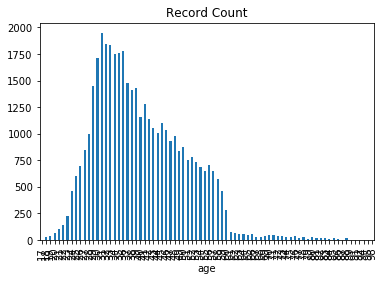

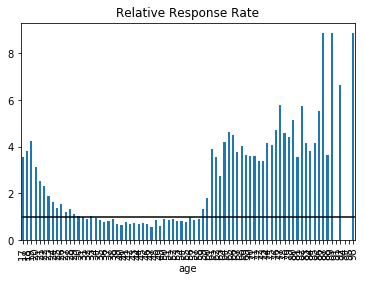

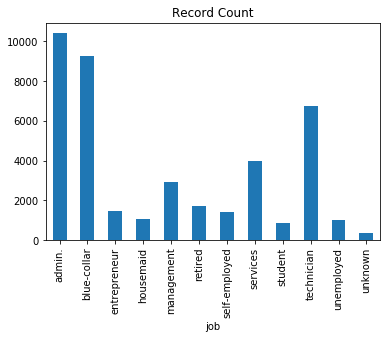

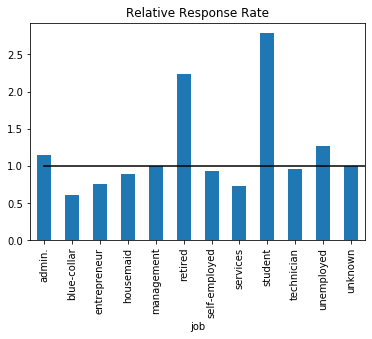

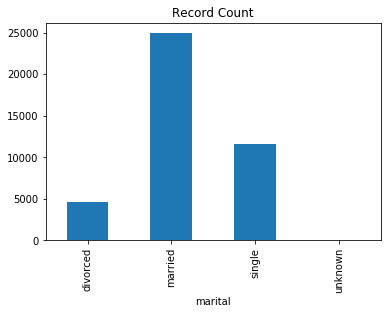

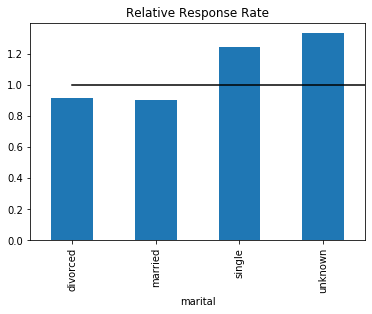

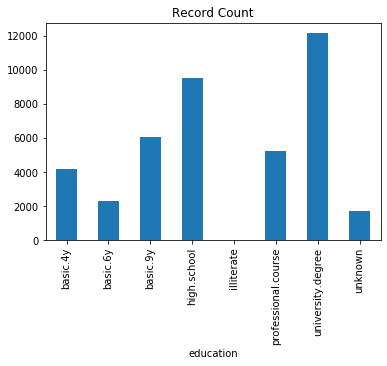

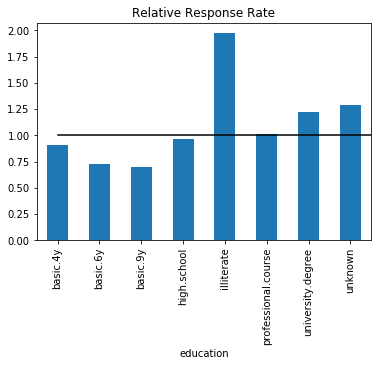

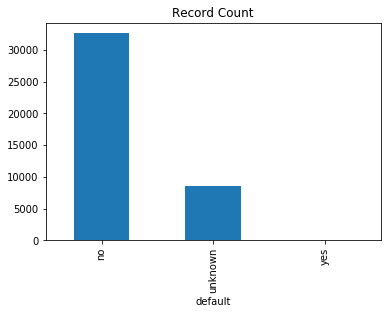

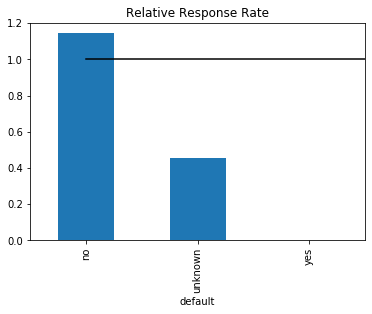

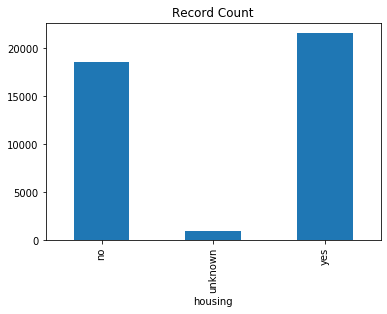

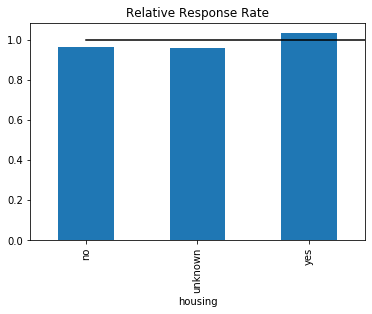

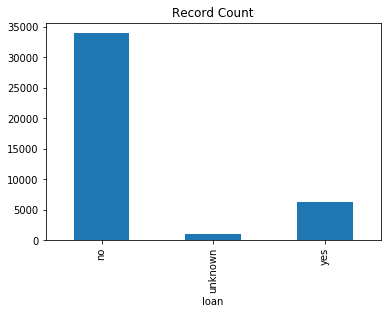

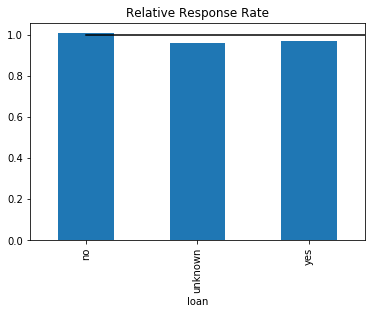

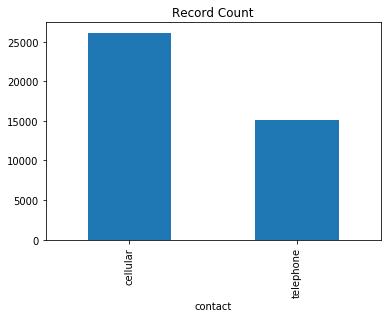

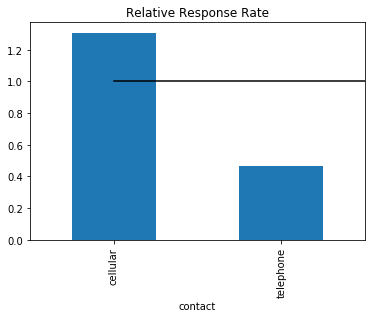

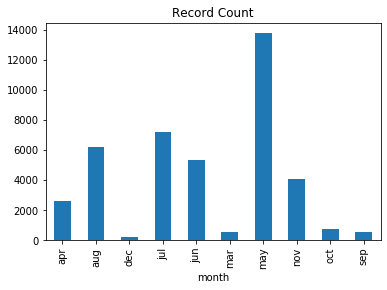

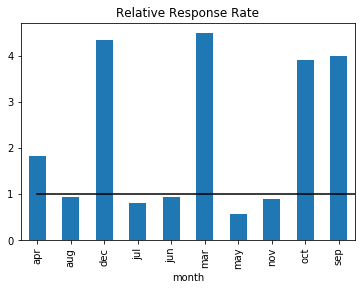

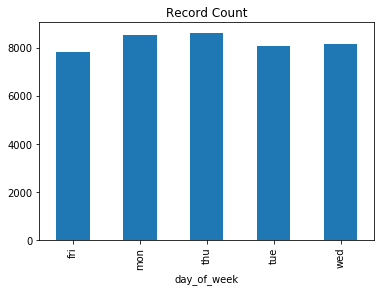

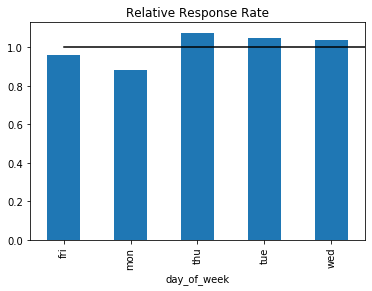

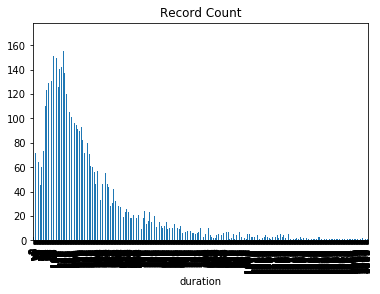

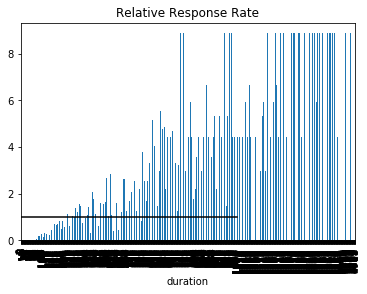

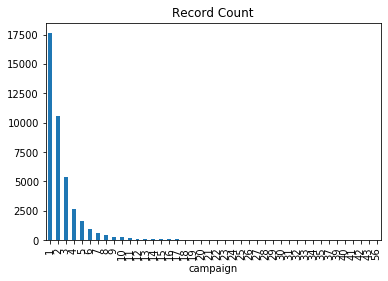

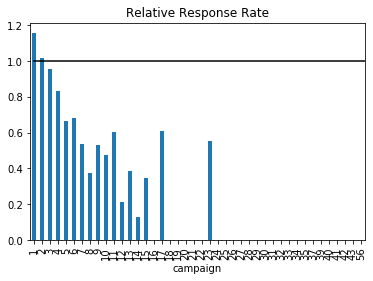

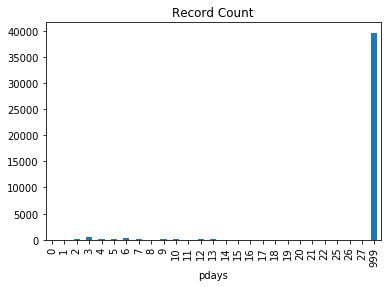

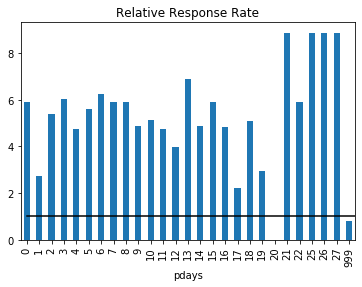

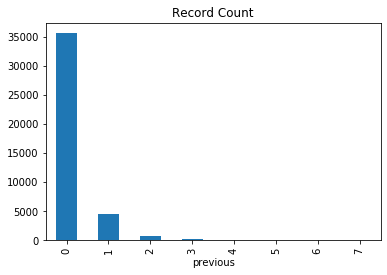

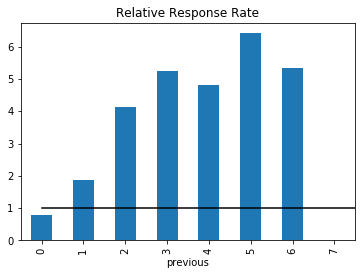

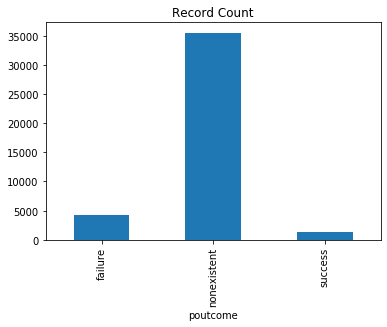

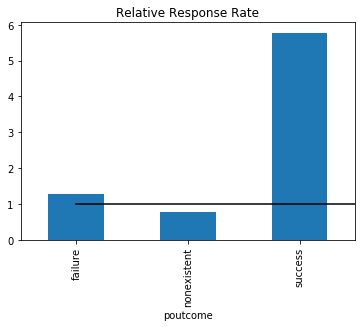

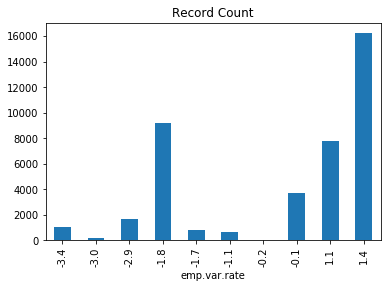

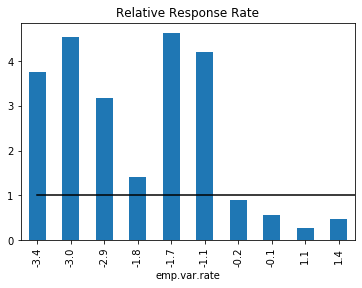

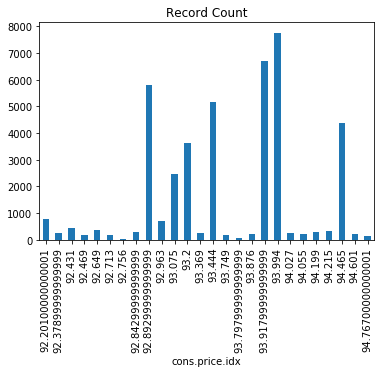

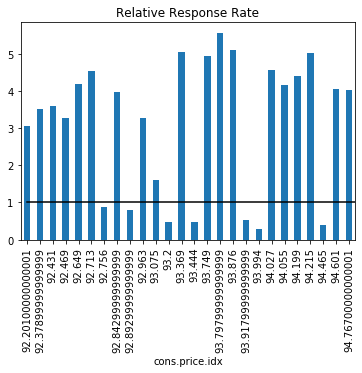

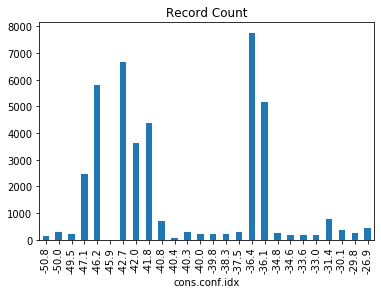

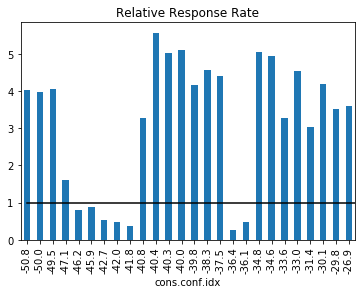

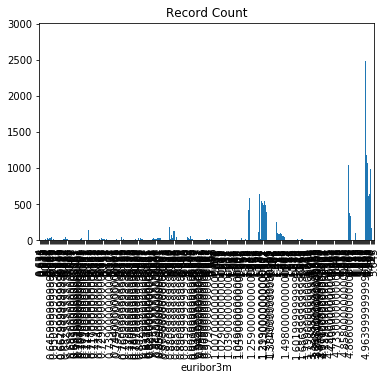

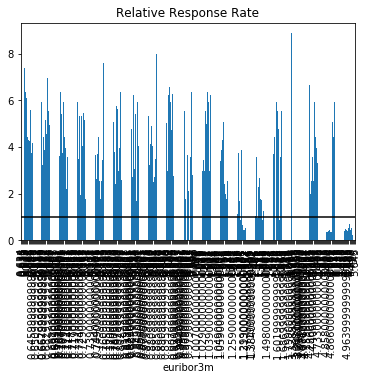

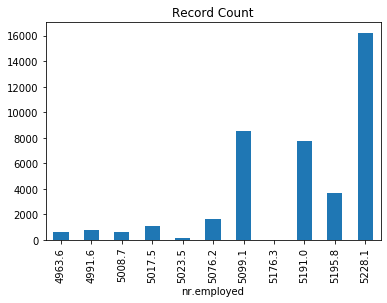

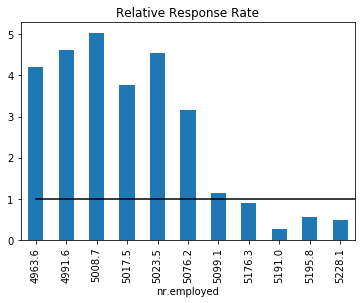

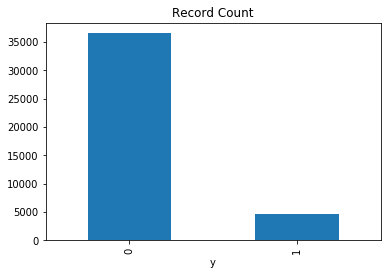

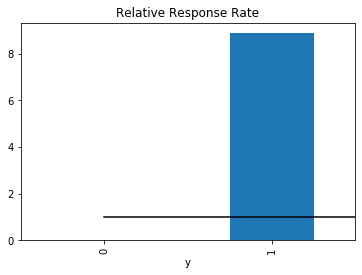

In [21]:
for col in plot_cols:
    plt.title('Record Count')
    plt.xlabel(col)
    data[col].value_counts().sort_index().plot(kind='bar')
    temp = data.groupby(col)['y'].mean(0) / rate
    plt.show()
    plt.xlabel(col)
    plt.title('Relative Response Rate')
    s.plot.line(color='black')
    temp.plot(kind='bar')
    plt.show()

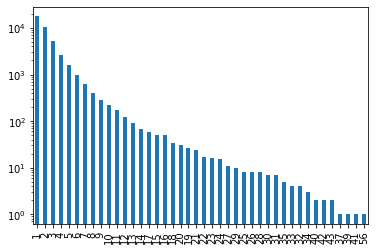

In [22]:
data['campaign'].value_counts().plot(kind='bar')
plt.yscale('log')

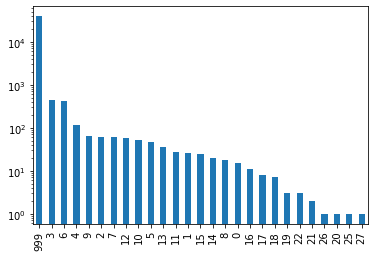

In [23]:
data['pdays'].value_counts().plot(kind='bar')
plt.yscale('log')

In [24]:
categorical_fields = ['job', 'marital', 'education', 'default', 'housing', 'loan', 'contact', 'month', 'day_of_week', 'poutcome']
numerical_fields = ['age','duration','campaign', 'pdays', 'previous', 'emp.var.rate', 'cons.price.idx','cons.conf.idx','euribor3m',
                      'nr.employed']
data[numerical_fields].describe()

,age,duration,campaign,pdays,previous,emp.var.rate,cons.price.idx,cons.conf.idx,euribor3m,nr.employed
count,41176.00,41176.00,41176.00,41176.00,41176.00,41176.00,41176.00,41176.00,41176.00,41176.00
mean,40.02,258.32,2.57,962.46,0.17,0.08,93.58,-40.50,3.62,5167.03
std,10.42,259.31,2.77,186.94,0.49,1.57,0.58,4.63,1.73,72.25
min,17.00,0.00,1.00,0.00,0.00,-3.40,92.20,-50.80,0.63,4963.60
25%,32.00,102.00,1.00,999.00,0.00,-1.80,93.08,-42.70,1.34,5099.10
50%,38.00,180.00,2.00,999.00,0.00,1.10,93.75,-41.80,4.86,5191.00
75%,47.00,319.00,3.00,999.00,0.00,1.40,93.99,-36.40,4.96,5228.10
max,98.00,4918.00,56.00,999.00,7.00,1.40,94.77,-26.90,5.04,5228.10


In [25]:
corr_score = data[numerical_fields].corr()

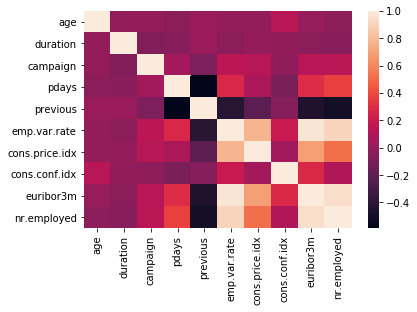

In [26]:
sns.heatmap(corr_score)

emp.var.rate and euribor3m
emp.var.rate and nr.employed
euribor3m and nr.employed
highly correlated to each other(>0.8)
Suggestion: delete emp.var.rate and euribor3m

## Feature Engineering

Now, to infer the missing values in 'job' and 'education', we make use of the cross-tabulation between 'job' and 'education'. Our hypothesis here is that 'job' is influenced by the 'education' of a person. Hence, we can infer 'job' based on the education of the person. Moreover, since we are just filling the missing values, we are not much concerned about the causal inference. We, therefore, can use the job to predict the education.

In [27]:
def cross_tab(df,f1,f2):
    jobs=list(df[f1].unique())
    edu=list(df[f2].unique())
    dataframes=[]
    for e in edu:
        dfe=df[df[f2]==e]
        dfejob=dfe.groupby(f1).count()[f2]
        dataframes.append(dfejob)
    xx=pd.concat(dataframes,axis=1)
    xx.columns=edu
    xx=xx.fillna(0)
    return xx

In [28]:
cross_tab(data,'job','education')

,basic.4y,high.school,basic.6y,basic.9y,professional.course,unknown,university.degree,illiterate
admin.,77,3329,151,499,363,249,5750,1.00
blue-collar,2318,878,1425,3623,453,454,94,8.00
entrepreneur,137,234,71,210,135,57,610,2.00
housemaid,474,174,77,94,59,42,139,1.00
management,100,298,85,166,89,123,2063,0.00
retired,597,276,75,145,241,97,284,3.00
self-employed,93,118,25,220,168,29,765,3.00
services,132,2680,226,388,218,150,173,0.00
student,26,357,13,99,43,167,170,0.00
technician,58,872,87,384,3317,212,1809,0.00


In [29]:
data['job'][data['age']>60].value_counts()

retired          677
housemaid         54
admin.            47
technician        34
management        30
unknown           21
blue-collar       20
self-employed      9
entrepreneur       8
unemployed         7
services           2
Name: job, dtype: int64

** Inferring education from jobs **: From the cross-tabulation, it can be seen that people with management jobs usually have a university degree. Hence wherever 'job' = management and 'education' = unknown, we can replace 'education' with 'university.degree'. Similarly, 'job' = 'services' --> 'education' = 'high.school' and 'job' = 'housemaid' --> 'education' = 'basic.4y'.

** Inferring jobs from education **: If 'education' = 'basic.4y' or 'basic.6y' or 'basic.9y' then the 'job' is usually 'blue-collar'. If 'education' = 'professional.course', then the 'job' = 'technician'.

** Inferring jobs from age**: As we see, if 'age' > 60, then the 'job' is 'retired,' which makes sense.

While imputing the values for job and education, we were cognizant of the fact that the correlations should make real world sense. If it didn't make real world sense, we didn't replace the missing values.

In [30]:
data.loc[(data['age']>60) & (data['job']=='unknown'), 'job'] = 'retired'
data.loc[(data['education']=='unknown') & (data['job']=='management'), 'education'] = 'university.degree'
data.loc[(data['education']=='unknown') & (data['job']=='services'), 'education'] = 'high.school'
data.loc[(data['education']=='unknown') & (data['job']=='housemaid'), 'education'] = 'basic.4y'
data.loc[(data['job'] == 'unknown') & (data['education']=='basic.4y'), 'job'] = 'blue-collar'
data.loc[(data['job'] == 'unknown') & (data['education']=='basic.6y'), 'job'] = 'blue-collar'
data.loc[(data['job'] == 'unknown') & (data['education']=='basic.9y'), 'job'] = 'blue-collar'
data.loc[(data['job']=='unknown') & (data['education']=='professional.course'), 'job'] = 'technician'

In [31]:
cross_tab(data,'job','education')

,basic.4y,high.school,basic.6y,basic.9y,professional.course,unknown,university.degree,illiterate
admin.,77.00,3329,151.00,499.00,363.00,249.00,5750,1.00
blue-collar,2366.00,878,1447.00,3654.00,453.00,454.00,94,8.00
entrepreneur,137.00,234,71.00,210.00,135.00,57.00,610,2.00
housemaid,516.00,174,77.00,94.00,59.00,0.00,139,1.00
management,100.00,298,85.00,166.00,89.00,0.00,2186,0.00
retired,601.00,276,75.00,145.00,243.00,111.00,285,3.00
self-employed,93.00,118,25.00,220.00,168.00,29.00,765,3.00
services,132.00,2830,226.00,388.00,218.00,0.00,173,0.00
student,26.00,357,13.00,99.00,43.00,167.00,170,0.00
technician,58.00,872,87.00,384.00,3327.00,212.00,1809,0.00


As we can see, we are able to reduce the number of unknowns and enhance our data set.

In [32]:
data.head()

,age,job,marital,education,default,housing,loan,contact,month,day_of_week,...,campaign,pdays,previous,poutcome,emp.var.rate,cons.price.idx,cons.conf.idx,euribor3m,nr.employed,y
0,56,housemaid,married,basic.4y,no,no,no,telephone,may,mon,...,1,999,0,nonexistent,1.10,93.99,-36.40,4.86,5191.00,0
1,57,services,married,high.school,unknown,no,no,telephone,may,mon,...,1,999,0,nonexistent,1.10,93.99,-36.40,4.86,5191.00,0
2,37,services,married,high.school,no,yes,no,telephone,may,mon,...,1,999,0,nonexistent,1.10,93.99,-36.40,4.86,5191.00,0
3,40,admin.,married,basic.6y,no,no,no,telephone,may,mon,...,1,999,0,nonexistent,1.10,93.99,-36.40,4.86,5191.00,0
4,56,services,married,high.school,no,no,yes,telephone,may,mon,...,1,999,0,nonexistent,1.10,93.99,-36.40,4.86,5191.00,0


In [33]:
data1 = data.copy()

# Model

In [34]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(data1, Y, test_size = 0.2, random_state = 101)

In [35]:
X_test.head()

,age,job,marital,education,default,housing,loan,contact,month,day_of_week,...,campaign,pdays,previous,poutcome,emp.var.rate,cons.price.idx,cons.conf.idx,euribor3m,nr.employed,y
26521,38,management,single,university.degree,no,no,no,cellular,nov,thu,...,4,999,0,nonexistent,-0.10,93.20,-42.00,4.08,5195.80,0
33163,35,blue-collar,married,high.school,no,yes,no,cellular,may,tue,...,1,999,0,nonexistent,-1.80,92.89,-46.20,1.29,5099.10,0
18770,25,admin.,married,university.degree,no,yes,no,cellular,jul,thu,...,5,999,0,nonexistent,1.40,93.92,-42.70,4.97,5228.10,0
180,34,technician,married,high.school,no,no,no,telephone,may,mon,...,1,999,0,nonexistent,1.10,93.99,-36.40,4.86,5191.00,0
10764,40,services,single,high.school,no,no,no,telephone,jun,tue,...,4,999,0,nonexistent,1.40,94.47,-41.80,4.96,5228.10,0


## Make categorical variables using target encoding with smoothing

In [36]:
print(categorical_fields)

['job', 'marital', 'education', 'default', 'housing', 'loan', 'contact', 'month', 'day_of_week', 'poutcome']


In [37]:
c = pd.DataFrame(50, index=np.arange(1), columns=categorical_fields)
c['job'] = 30
c['marital'] = 30
c['education'] = 30
c['default'] = 30
c['loan'] = 30
c['contact'] = 30
c['month'] = 30
c['day_of_week'] = 30
c['poutcome'] = 30
c.head(20)

,job,marital,education,default,housing,loan,contact,month,day_of_week,poutcome
0,30,30,30,30,50,30,30,30,30,30


In [38]:
nmid = pd.DataFrame(100, index=np.arange(1), columns=categorical_fields)
nmid['job'] = 10
nmid['marital'] = 10
nmid['education'] = 10
nmid['default'] = 10
nmid['loan'] = 10
nmid['contact'] = 10
nmid['month'] = 10
nmid['day_of_week'] = 10
nmid['poutcome'] = 10
nmid.head(20)

,job,marital,education,default,housing,loan,contact,month,day_of_week,poutcome
0,10,10,10,10,100,10,10,10,10,10


In [39]:
y_avg = data1['y'].mean()
for catvar in categorical_fields:
    y_catvar = X_train.groupby(catvar)['y'].mean()
    num_instances_catvar = X_train.groupby(catvar).size()
    y_catvar_smooth = y_avg + (y_catvar - y_avg) / (1 + np.exp(-(num_instances_catvar-nmid.at[0,catvar])/c.at[0,catvar]))
    X_train[catvar+'_tgt'] = X_train[catvar].map(y_catvar_smooth)
    X_test[catvar+'_tgt'] = X_test[catvar].map(y_catvar_smooth)
    data1[catvar+'_tgt'] = data[catvar].map(y_catvar_smooth)
    
X_train.drop(columns=categorical_fields, inplace=True)
X_test.drop(columns=categorical_fields, inplace=True)
data1.drop(columns=categorical_fields, inplace=True)
X_train.drop(columns='y', inplace=True)
X_test.drop(columns='y', inplace=True)
X_train.head()

,age,duration,campaign,pdays,previous,emp.var.rate,cons.price.idx,cons.conf.idx,euribor3m,nr.employed,job_tgt,marital_tgt,education_tgt,default_tgt,housing_tgt,loan_tgt,contact_tgt,month_tgt,day_of_week_tgt,poutcome_tgt
23147,47,111,2,999,0,1.40,93.44,-36.10,4.96,5228.10,0.11,0.10,0.11,0.13,0.11,0.11,0.14,0.11,0.12,0.09
13990,42,241,2,999,0,1.40,93.92,-42.70,4.96,5228.10,0.11,0.11,0.13,0.13,0.11,0.11,0.14,0.09,0.10,0.09
18828,43,116,1,999,0,1.40,93.44,-36.10,4.97,5228.10,0.13,0.10,0.13,0.13,0.11,0.11,0.14,0.11,0.10,0.09
25971,56,501,2,999,0,-0.10,93.20,-42.00,4.12,5195.80,0.08,0.10,0.13,0.13,0.11,0.11,0.14,0.10,0.11,0.09
2943,48,149,2,999,0,1.10,93.99,-36.40,4.86,5191.00,0.13,0.10,0.13,0.05,0.11,0.11,0.05,0.06,0.11,0.09


In [40]:
X_train.columns

Index(['age', 'duration', 'campaign', 'pdays', 'previous', 'emp.var.rate',
       'cons.price.idx', 'cons.conf.idx', 'euribor3m', 'nr.employed',
       'job_tgt', 'marital_tgt', 'education_tgt', 'default_tgt', 'housing_tgt',
       'loan_tgt', 'contact_tgt', 'month_tgt', 'day_of_week_tgt',
       'poutcome_tgt'],
      dtype='object')

## Feature Importance at Glance

In [41]:
# Do univariate tests
nvars = len(data1.columns) - 1
Lift = pd.DataFrame(np.zeros((nvars+1,2)))
i = 0
for column in data1:
    print(i, column)
    Lift.loc[i, 0] = column
    i= i+1
    
Lift.columns = ['field', 'univariate lift']    
Lift

0 age
1 duration
2 campaign
3 pdays
4 previous
5 emp.var.rate
6 cons.price.idx
7 cons.conf.idx
8 euribor3m
9 nr.employed
10 y
11 job_tgt
12 marital_tgt
13 education_tgt
14 default_tgt
15 housing_tgt
16 loan_tgt
17 contact_tgt
18 month_tgt
19 day_of_week_tgt
20 poutcome_tgt


,field,univariate lift
0,age,0.00
1,duration,0.00
2,campaign,0.00
3,pdays,0.00
4,previous,0.00
5,emp.var.rate,0.00
6,cons.price.idx,0.00
7,cons.conf.idx,0.00
8,euribor3m,0.00
9,nr.employed,0.00


In [42]:
topRows = int(round(len(data1)*0.3))
j = 0
third_records = .2 * len(data1)
for column in data1:
    temp1 = data1.sort_values(column,ascending=False).head(topRows)
    temp2 = data1.sort_values(column,ascending=True).head(topRows)
    needed1 = temp1.loc[:,'y']
    needed2 = temp2.loc[:,'y']
    lift1 = sum(needed1)/ third_records / rate
    lift2 = sum(needed2)/ third_records / rate
    lift_actual = np.maximum(lift1,lift2)
    print(j, column, lift_actual)
    Lift.loc[j, 'univariate lift'] = lift_actual
    j = j +1

0 age 1.7740892433714162
1 duration 3.522310842854063
2 campaign 1.524035352446648
3 pdays 2.3431774089243373
4 previous 2.192282819573184
5 emp.var.rate 2.9370553998706614
6 cons.price.idx 2.443414528993318
7 cons.conf.idx 1.645828842422936
8 euribor3m 3.270101314938564
9 nr.employed 3.4554860961414096
10 y 5.0
11 job_tgt 2.051088596680319
12 marital_tgt 2.0694115111015305
13 education_tgt 1.8322914421211467
14 default_tgt 2.278508299202414
15 housing_tgt 1.2050010778184954
16 loan_tgt 1.9745634835093768
17 contact_tgt 1.7751670618667814
18 month_tgt 2.377667600776029
19 day_of_week_tgt 1.5973270101314938
20 poutcome_tgt 2.1890493640870874


In [43]:
Lift.sort_values(by=['univariate lift'], ascending=False, inplace=True)
Lift

,field,univariate lift
10,y,5.00
1,duration,3.52
9,nr.employed,3.46
8,euribor3m,3.27
5,emp.var.rate,2.94
6,cons.price.idx,2.44
18,month_tgt,2.38
3,pdays,2.34
14,default_tgt,2.28
4,previous,2.19


In [44]:
data1.columns

Index(['age', 'duration', 'campaign', 'pdays', 'previous', 'emp.var.rate',
       'cons.price.idx', 'cons.conf.idx', 'euribor3m', 'nr.employed', 'y',
       'job_tgt', 'marital_tgt', 'education_tgt', 'default_tgt', 'housing_tgt',
       'loan_tgt', 'contact_tgt', 'month_tgt', 'day_of_week_tgt',
       'poutcome_tgt'],
      dtype='object')

In [45]:
columns_to_drop = [
#     'age'
     'duration'
#     ,'campaign'
#     ,'pdays'
#     ,'previous'
#     ,'emp.var.rate'
#     ,'cons.price.idx'
#     ,'cons.conf.idx'
#     ,'euribor3m'
#     ,'nr.employed'
#     ,'job_tgt'
#     ,'marital_tgt'
#     ,'education_tgt'
#     ,'default_tgt'
#     ,'housing_tgt'
#     ,'loan_tgt'
#     ,'contact_tgt'
#     ,'month_tgt'
#     ,'day_of_week_tgt'
#     ,'poutcome_tgt'
    ]

In [46]:
X_train.drop(columns=columns_to_drop, inplace=True)
X_test.drop(columns=columns_to_drop, inplace=True)
data1.drop(columns=columns_to_drop, inplace=True)

In [47]:
X_train.columns

Index(['age', 'campaign', 'pdays', 'previous', 'emp.var.rate',
       'cons.price.idx', 'cons.conf.idx', 'euribor3m', 'nr.employed',
       'job_tgt', 'marital_tgt', 'education_tgt', 'default_tgt', 'housing_tgt',
       'loan_tgt', 'contact_tgt', 'month_tgt', 'day_of_week_tgt',
       'poutcome_tgt'],
      dtype='object')

In [48]:
X_train.shape

(32940, 19)

In [49]:
X_test.shape

(8236, 19)

In [50]:
from sklearn.preprocessing import StandardScaler
sc_X = StandardScaler()
X_train = sc_X.fit_transform(X_train)
X_test = sc_X.transform(X_test)

## Model Selection

In [51]:
from sklearn.linear_model import LogisticRegression
logmodel = LogisticRegression() 
logmodel.fit(X_train,y_train)

LogisticRegression()

In [52]:
from sklearn.neighbors import KNeighborsClassifier
knn = KNeighborsClassifier()
knn.fit(X_train, y_train)

KNeighborsClassifier()

In [53]:
from sklearn.svm import SVC
svc= SVC()
svc.fit(X_train, y_train)

SVC()

In [54]:
from sklearn.tree import DecisionTreeClassifier
dtree = DecisionTreeClassifier() #criterion = entopy, gini
dtree.fit(X_train, y_train)

DecisionTreeClassifier()

In [55]:
from sklearn.ensemble import RandomForestClassifier
rfc = RandomForestClassifier()#criterion = entopy,gini
rfc.fit(X_train, y_train)

RandomForestClassifier()

In [56]:
from sklearn.naive_bayes import GaussianNB
gaussiannb= GaussianNB()
gaussiannb.fit(X_train, y_train)

GaussianNB()

In [57]:
from xgboost import XGBClassifier
xgb = XGBClassifier()
xgb.fit(X_train, y_train)

XGBClassifier()

In [58]:
from sklearn.ensemble import GradientBoostingClassifier
gbk = GradientBoostingClassifier()
gbk.fit(X_train, y_train)

GradientBoostingClassifier()

In [59]:
# Use 5-fold Cross Validation to get the accuracy for different models
from sklearn import model_selection
model_names = ['Random Forest Classifier', 'Decision Tree Classifier', 'Support Vector Machine',
                           'K-Near Neighbors', 'Logistic Model', 'Gausian NB', 'XGBoost', 'Gradient Boosting']
model_list = [rfc,dtree,svc,knn,logmodel,gaussiannb,xgb,gbk]
count = 0

for classifier in model_list:
    cv_score = model_selection.cross_val_score(classifier, X_train, y_train, cv=5)
    print(cv_score)
    print('Model accuracy of ' + model_names[count] + ' is ' + str(cv_score.mean()))
    count += 1

[0.89420158 0.89632665 0.893898   0.89146934 0.89541591]
Model accuracy of Random Forest Classifier is 0.8942622950819672
[0.83879781 0.84304797 0.83758349 0.83029751 0.84061931]
Model accuracy of Decision Tree Classifier is 0.8380692167577413
[0.89996964 0.8989071  0.90194293 0.89921069 0.90330905]
Model accuracy of Support Vector Machine is 0.9006678809957498
[0.89253188 0.89131755 0.89086217 0.88843352 0.89404979]
Model accuracy of K-Near Neighbors is 0.8914389799635701
[0.90012143 0.89587128 0.9007286  0.89829994 0.89936248]
Model accuracy of Logistic Model is 0.8988767455980572
[0.86778992 0.86551305 0.86794171 0.86065574 0.86672738]
Model accuracy of Gausian NB is 0.865725561627201
[0.89996964 0.90148755 0.90103218 0.90027322 0.90255009]
Model accuracy of XGBoost is 0.9010625379477839
[0.8989071  0.90209472 0.90224651 0.89875531 0.90421979]
Model accuracy of Gradient Boosting is 0.9012446873102611


## Hyperparameter Tuning

In [60]:
from sklearn.model_selection import GridSearchCV

# helper function for printing out grid search results 
def print_grid_search_metrics(gs):
    print ("Best score: " + str(gs.best_score_))
    print ("Best parameters set:")
    best_parameters = gs.best_params_
    for param_name in sorted(parameters.keys()):
        print(param_name + ':' + str(best_parameters[param_name]))

In [61]:
# Possible hyperparamter options for Logistic Regression Regularization
# Penalty is choosed from L1 or L2
# C is the lambda value(weight) for L1 and L2

# ('l1', 1) ('l1', 5) ('l1', 10) ('l2', 1) ('l2', 5) ('l2', 10)
parameters = {
    'penalty':('l1', 'l2'), 
    'C':(0.005,0.01, 0.1)  
}
Grid_LR = GridSearchCV(LogisticRegression(solver='liblinear'),parameters, cv=5)
Grid_LR.fit(X_train, y_train) 

GridSearchCV(cv=5, estimator=LogisticRegression(solver='liblinear'),
             param_grid={'C': (0.005, 0.01, 0.1), 'penalty': ('l1', 'l2')})

In [62]:
# the best hyperparameter combination
print_grid_search_metrics(Grid_LR)

Best score: 0.8993928354584092
Best parameters set:
C:0.01
penalty:l1


In [63]:
# best LR model
best_LR_model = Grid_LR.best_estimator_

In [64]:
# Possible hyperparamter options for Random Forest
parameters = {
    'n_estimators' : [50,100,500],
    'min_samples_split': [2,50,100],
    'min_samples_leaf': [1,5,10]
}
Grid_RF = GridSearchCV(RandomForestClassifier(),parameters, cv=5)
Grid_RF.fit(X_train, y_train)

GridSearchCV(cv=5, estimator=RandomForestClassifier(),
             param_grid={'min_samples_leaf': [1, 5, 10],
                         'min_samples_split': [2, 50, 100],
                         'n_estimators': [50, 100, 500]})

In [65]:
# the best hyperparameter combination
print_grid_search_metrics(Grid_RF)

Best score: 0.9013054037644203
Best parameters set:
min_samples_leaf:5
min_samples_split:100
n_estimators:50


In [66]:
# best RF model
best_RF_model = Grid_RF.best_estimator_

In [67]:
# Possible hyperparamter options for xgBoost
parameters = {
    'max_depth' : [5,10],
    'min_child_weight': [1,3]
}
Grid_xgb = GridSearchCV(XGBClassifier(),parameters, cv=5)
Grid_xgb.fit(X_train, y_train)

GridSearchCV(cv=5, estimator=XGBClassifier(),
             param_grid={'max_depth': [5, 10], 'min_child_weight': [1, 3]})

In [68]:
# the best hyperparameter combination
print_grid_search_metrics(Grid_xgb)

Best score: 0.9010928961748634
Best parameters set:
max_depth:5
min_child_weight:1


In [69]:
# best RF model
best_xgb_model = Grid_xgb.best_estimator_

In [70]:
# Possible hyperparamter options for GBDT
# Choose the number of trees
parameters = {
    'n_estimators' : [50,100,150],
    'min_samples_split': [2,20,50]
}
Grid_GBDT = GridSearchCV(GradientBoostingClassifier(),parameters, cv=5)
Grid_GBDT.fit(X_train, y_train)

GridSearchCV(cv=5, estimator=GradientBoostingClassifier(),
             param_grid={'min_samples_split': [2, 20, 50],
                         'n_estimators': [50, 100, 150]})

In [71]:
# the best hyperparameter combination
print_grid_search_metrics(Grid_GBDT)

Best score: 0.9012143290831816
Best parameters set:
min_samples_split:2
n_estimators:100


In [72]:
# best GBDT
best_gbdt_model = Grid_GBDT.best_estimator_

## Model Evaluation

In [73]:
results_train = y_train.copy()
results_train.columns = ['y_actual']
results_test = y_test.copy()
results_test.columns = ['y_actual']
confusion_matrices = []

In [74]:
def results(col_name,model):
    results_train[col_name] = model.predict_proba(X_train)[:,1]
    results_test[col_name] =  model.predict_proba(X_test)[:,1]

In [75]:
from sklearn.metrics import confusion_matrix
from sklearn.metrics import classification_report
from sklearn.metrics import precision_score
from sklearn.metrics import recall_score

# calculate accuracy, precision and recall, [[tn, fp],[]]
def cal_evaluation(classifier, cm):
    tn = cm[0][0]
    fp = cm[0][1]
    fn = cm[1][0]
    tp = cm[1][1]
    accuracy  = (tp + tn) / (tp + fp + fn + tn + 0.0)
    precision = tp / (tp + fp + 0.0)
    recall = tp / (tp + fn + 0.0)
    print (classifier)
    print ("Accuracy is: " + str(accuracy))
    print ("precision is: " + str(precision))
    print ("recall is: " + str(recall))

# print out confusion matrices
def draw_confusion_matrices(confusion_matricies):
    class_names = ['Not','Response']
    for cm in confusion_matrices:
        classifier, cm = cm[0], cm[1]
        cal_evaluation(classifier, cm)
        fig = plt.figure()
        ax = fig.add_subplot(111)
        cax = ax.matshow(cm, interpolation='nearest',cmap=plt.get_cmap('Reds'))
        plt.title('Confusion matrix for ' + classifier)
        fig.colorbar(cax)
        ax.set_xticklabels([''] + class_names)
        ax.set_yticklabels([''] + class_names)
        plt.xlabel('Predicted')
        plt.ylabel('True')
        plt.show()

In [76]:
# model_name = [('logreg','rfc','xgb','gbdt']
model = {'logreg':best_LR_model,'rfc':best_RF_model,'xgb':best_xgb_model,'gbdt':best_gbdt_model}

In [77]:
for mod in model.keys():
    results(mod,model[mod])

In [78]:
for mod in model.keys():
    confusion_matrices.append((mod,confusion_matrix(y_test,model[mod].predict(X_test))))


logreg
Accuracy is: 0.8963088878096164
precision is: 0.7094594594594594
recall is: 0.2147239263803681


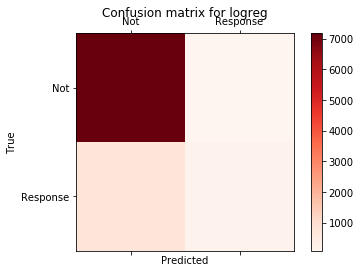

rfc
Accuracy is: 0.8974016512870325
precision is: 0.696165191740413
recall is: 0.24130879345603273


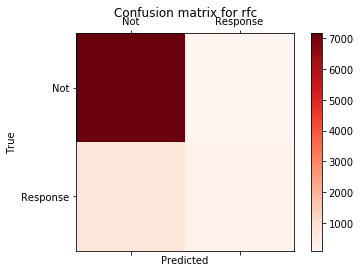

xgb
Accuracy is: 0.8987372510927635
precision is: 0.6884816753926701
recall is: 0.2689161554192229


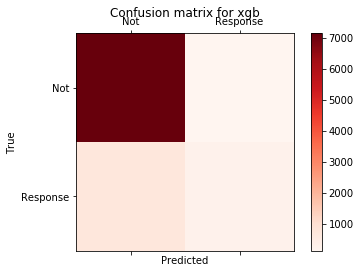

gbdt
Accuracy is: 0.8989800874210782
precision is: 0.7073863636363636
recall is: 0.254601226993865


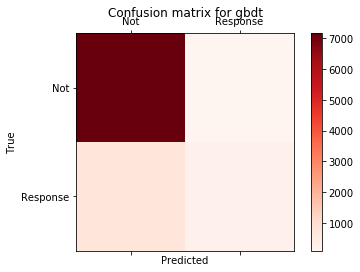

In [79]:
draw_confusion_matrices(confusion_matrices)

In [80]:
results_test.columns

Index(['y_actual', 'logreg', 'rfc', 'xgb', 'gbdt'], dtype='object')

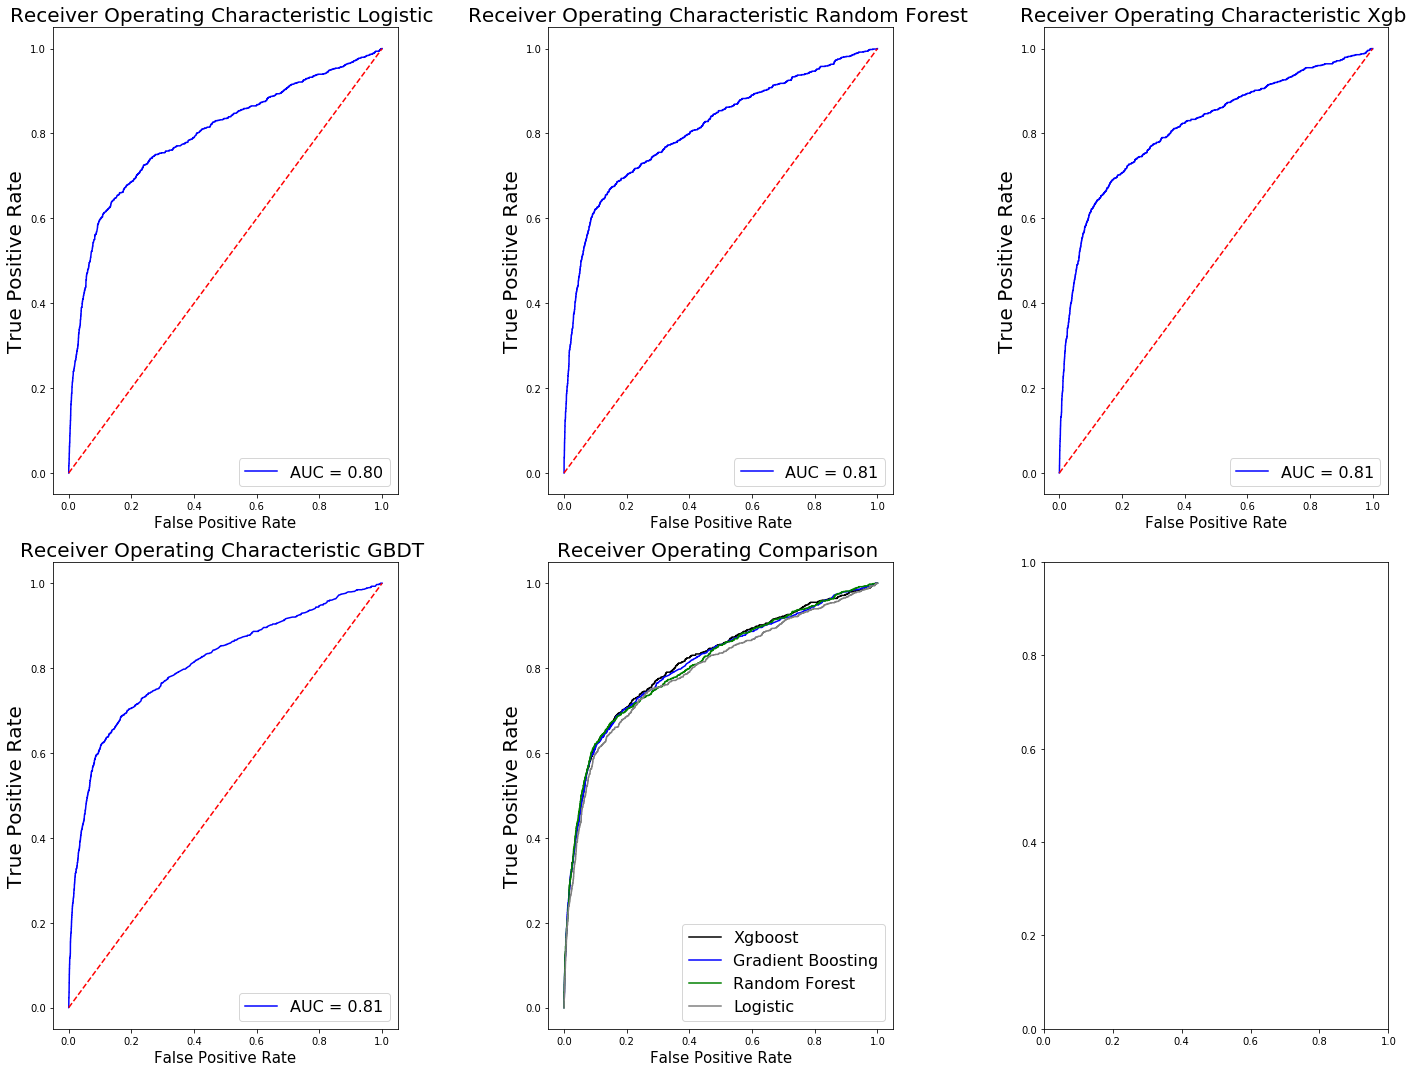

In [81]:
from sklearn.metrics import roc_curve
from sklearn import metrics
#fig, (ax1, ax2, ax3, ax4, ax5) = plt.subplots(nrows = 2, ncols = 3, figsize = (15, 4))
fig, ax_arr = plt.subplots(nrows = 2, ncols = 3, figsize = (20,15))

#LOGMODEL
probs = best_LR_model.predict_proba(X_test)
preds = probs[:,1]
fprlog, tprlog, thresholdlog = metrics.roc_curve(y_test, preds)
roc_auclog = metrics.auc(fprlog, tprlog)

ax_arr[0,0].plot(fprlog, tprlog, 'b', label = 'AUC = %0.2f' % roc_auclog)
ax_arr[0,0].plot([0, 1], [0, 1],'r--')
ax_arr[0,0].set_title('Receiver Operating Characteristic Logistic ',fontsize=20)
ax_arr[0,0].set_ylabel('True Positive Rate',fontsize=20)
ax_arr[0,0].set_xlabel('False Positive Rate',fontsize=15)
ax_arr[0,0].legend(loc = 'lower right', prop={'size': 16})

#RANDOM FOREST --------------------
probs = best_RF_model.predict_proba(X_test)
preds = probs[:,1]
fprrfc, tprrfc, thresholdrfc = metrics.roc_curve(y_test, preds)
roc_aucrfc = metrics.auc(fprrfc, tprrfc)

ax_arr[0,1].plot(fprrfc, tprrfc, 'b', label = 'AUC = %0.2f' % roc_aucrfc)
ax_arr[0,1].plot([0, 1], [0, 1],'r--')
ax_arr[0,1].set_title('Receiver Operating Characteristic Random Forest ',fontsize=20)
ax_arr[0,1].set_ylabel('True Positive Rate',fontsize=20)
ax_arr[0,1].set_xlabel('False Positive Rate',fontsize=15)
ax_arr[0,1].legend(loc = 'lower right', prop={'size': 16})

#xgboost----------------------
probs = best_xgb_model.predict_proba(X_test)
preds = probs[:,1]
fprxgb, tprxgb, thresholdxgb = metrics.roc_curve(y_test, preds)
roc_aucxgb = metrics.auc(fprxgb, tprxgb)

ax_arr[0,2].plot(fprxgb, tprxgb, 'b', label = 'AUC = %0.2f' % roc_aucxgb)
ax_arr[0,2].plot([0, 1], [0, 1],'r--')
ax_arr[0,2].set_title('Receiver Operating Characteristic Xgb ',fontsize=20)
ax_arr[0,2].set_ylabel('True Positive Rate',fontsize=20)
ax_arr[0,2].set_xlabel('False Positive Rate',fontsize=15)
ax_arr[0,2].legend(loc = 'lower right', prop={'size': 16})

#GBDT ---------------------
probs = best_gbdt_model.predict_proba(X_test)
preds = probs[:,1]
fprdtree, tprdtree, thresholddtree = metrics.roc_curve(y_test, preds)
roc_aucdtree = metrics.auc(fprdtree, tprdtree)

ax_arr[1,0].plot(fprdtree, tprdtree, 'b', label = 'AUC = %0.2f' % roc_aucdtree)
ax_arr[1,0].plot([0, 1], [0, 1],'r--')
ax_arr[1,0].set_title('Receiver Operating Characteristic GBDT ',fontsize=20)
ax_arr[1,0].set_ylabel('True Positive Rate',fontsize=20)
ax_arr[1,0].set_xlabel('False Positive Rate',fontsize=15)
ax_arr[1,0].legend(loc = 'lower right', prop={'size': 16})


#ALL PLOTS ----------------------------------
ax_arr[1,1].plot(fprxgb, tprxgb, 'b', label = 'Xgboost', color='black')
ax_arr[1,1].plot(fprdtree, tprdtree, 'b', label = 'Gradient Boosting', color='blue')
ax_arr[1,1].plot(fprrfc, tprrfc, 'b', label = 'Random Forest', color='green')
ax_arr[1,1].plot(fprlog, tprlog, 'b', label = 'Logistic', color='grey')
ax_arr[1,1].set_title('Receiver Operating Comparison ',fontsize=20)
ax_arr[1,1].set_ylabel('True Positive Rate',fontsize=20)
ax_arr[1,1].set_xlabel('False Positive Rate',fontsize=15)
ax_arr[1,1].legend(loc = 'lower right', prop={'size': 16})

plt.subplots_adjust(wspace=0.2)
plt.tight_layout() 

# Marketing Analytics

In [82]:
tot_train = len(y_train)
tot_goods_train = y_train['label'].sum()
tot_bads_train = tot_train - tot_goods_train
tot_test = len(y_test)
tot_goods_test = y_test['label'].sum()
tot_bads_test = tot_test - tot_goods_test
response_rate_train = tot_goods_train / tot_train
response_rate_test = tot_goods_test / tot_test
print(response_rate_train)
print(response_rate_test)

0.11114146933819065
0.11874696454589606


In [83]:
cost_per_contact = 3
revenue_per_good = 40.

In [84]:
lift_bin = 20
cols_eval = ['logreg', 'rfc', 'xgb', 'gbdt']
for col_eval in cols_eval:
    cols = ['bin','tot recs','bin recs','#g','#b','%g','%b','cg','cb','%cg','%cb','KS','bin resp rate','cum resp rate','bin lift','cum lift','cost','revenue','profit']
    lift_trn = pd.DataFrame(np.zeros((101, 19)), columns = cols)
    lift_tst = pd.DataFrame(np.zeros((101, 19)), columns = cols)
    trn_sorted = results_train.sort_values(col_eval,ascending=False)
    tst_sorted = results_test.sort_values(col_eval,ascending=False)

    for i in range(101):
        percent_rows_trn = int(round(results_train.shape[0]*0.01*i))
        percent_rows_tst = int(round(results_test.shape[0]*0.01*i))
        temp_trn = trn_sorted.head(percent_rows_trn)
        temp_tst = tst_sorted.head(percent_rows_tst)
        num_good_trn = sum(temp_trn.loc[:,'y_actual'])
        num_good_tst = sum(temp_tst.loc[:,'y_actual'])
        num_tot_trn = len(temp_trn)
        num_tot_tst = len(temp_tst)
        num_bad_trn = num_tot_trn - num_good_trn
        num_bad_tst = num_tot_tst - num_good_tst

        lift_trn.loc[i, 'bin'] = i
        lift_trn.loc[i,'bin recs'] = 0
        lift_trn.loc[i, 'tot recs'] = num_tot_trn
        lift_trn.loc[i, 'cg'] = num_good_trn
        lift_trn.loc[i, 'cb'] = num_bad_trn
        lift_tst.loc[i, 'bin'] = i
        lift_tst.loc[i,'bin recs'] = 0
        lift_tst.loc[i, 'tot recs'] = num_tot_tst
        lift_tst.loc[i, 'cg'] = num_good_tst
        lift_tst.loc[i, 'cb'] = num_bad_tst

        if i != 0:
            lift_trn.loc[i, '#g'] = num_good_trn - lift_trn.loc[i-1, 'cg']
            lift_trn.loc[i, '#b'] = num_bad_trn - lift_trn.loc[i-1, 'cb']
            lift_trn.loc[i,'bin recs'] = lift_trn.loc[i, '#g'] + lift_trn.loc[i, '#b']
            lift_trn.loc[i, '%g'] = 100 * lift_trn.loc[i, '#g'] / tot_goods_train
            lift_trn.loc[i, '%b'] = 100 - lift_trn.loc[i, '%g']
            lift_trn.loc[i, '%cg'] = 100 * num_good_trn / tot_goods_train
            lift_trn.loc[i, '%cb'] = 100 * num_bad_trn / tot_bads_train
            lift_trn.loc[i, 'KS'] = -(lift_trn.loc[i, '%cb'] - lift_trn.loc[i, '%cg'])
            lift_trn.loc[i, 'bin resp rate'] = lift_trn.loc[i, '#g'] / lift_trn.loc[i, 'bin recs']
            lift_trn.loc[i, 'cum resp rate'] = lift_trn.loc[i, 'cg'] / lift_trn.loc[i, 'tot recs']
            lift_trn.loc[i, 'bin lift'] = lift_trn.loc[i, 'bin resp rate'] / response_rate_train
            lift_trn.loc[i, 'cum lift'] = lift_trn.loc[i, 'cum resp rate'] / response_rate_train
            lift_trn.loc[i, 'cost'] = lift_trn.loc[i, 'tot recs'] * cost_per_contact
            lift_trn.loc[i, 'revenue'] = lift_trn.loc[i, 'cg'] * revenue_per_good
            lift_trn.loc[i, 'profit'] = lift_trn.loc[i, 'revenue'] - lift_trn.loc[i, 'cost']

            lift_tst.loc[i, '#g'] = num_good_tst - lift_tst.loc[i-1, 'cg']
            lift_tst.loc[i, '#b'] = num_bad_tst - lift_tst.loc[i-1, 'cb']
            lift_tst.loc[i,'bin recs'] = lift_tst.loc[i, '#g'] + lift_tst.loc[i, '#b']
            lift_tst.loc[i, '%g'] = 100 * lift_tst.loc[i, '#g'] / tot_goods_test
            lift_tst.loc[i, '%b'] = 100 - lift_tst.loc[i, '%g']
            lift_tst.loc[i, '%cg'] = 100 * num_good_tst / tot_goods_test
            lift_tst.loc[i, '%cb'] = 100 * num_bad_tst / tot_bads_test
            lift_tst.loc[i, 'KS'] = -(lift_tst.loc[i, '%cb'] - lift_tst.loc[i, '%cg'])
            lift_tst.loc[i, 'bin resp rate'] = lift_tst.loc[i, '#g'] / lift_tst.loc[i, 'bin recs']
            lift_tst.loc[i, 'cum resp rate'] = lift_tst.loc[i, 'cg'] / lift_tst.loc[i, 'tot recs']
            lift_tst.loc[i, 'bin lift'] = lift_tst.loc[i, 'bin resp rate'] / response_rate_test        
            lift_tst.loc[i, 'cum lift'] = lift_tst.loc[i, 'cum resp rate'] / response_rate_test
            lift_tst.loc[i, 'cost'] = lift_tst.loc[i, 'tot recs'] * cost_per_contact
            lift_tst.loc[i, 'revenue'] = lift_tst.loc[i, 'cg'] * revenue_per_good
            lift_tst.loc[i, 'profit'] = lift_tst.loc[i, 'revenue'] - lift_tst.loc[i, 'cost']


    first_bin_lift = lift_tst.loc[1,'cum lift']
    lift_profit_tst_max = lift_tst['profit'].max()
    print('Model is', col_eval, '   Max profit is',lift_profit_tst_max, '   Lift in the ',lift_bin,'th bin is', lift_tst.loc[lift_bin,'cum lift'])

# results_train.to_csv('results_train.csv')
# results_test.to_csv('results_test.csv')
lift_trn.to_csv('lift_trn.csv',index=False)
lift_tst.to_csv('lift_tst.csv',index=False)

Model is logreg    Max profit is 21092.0    Lift in the  20 th bin is 3.2059107281877073
Model is rfc    Max profit is 21118.0    Lift in the  20 th bin is 3.287720252351987
Model is xgb    Max profit is 21511.0    Lift in the  20 th bin is 3.2826071570917192
Model is gbdt    Max profit is 21236.0    Lift in the  20 th bin is 3.272380966571184


Text(0.5, 0, 'Campaign Penetration Depth')

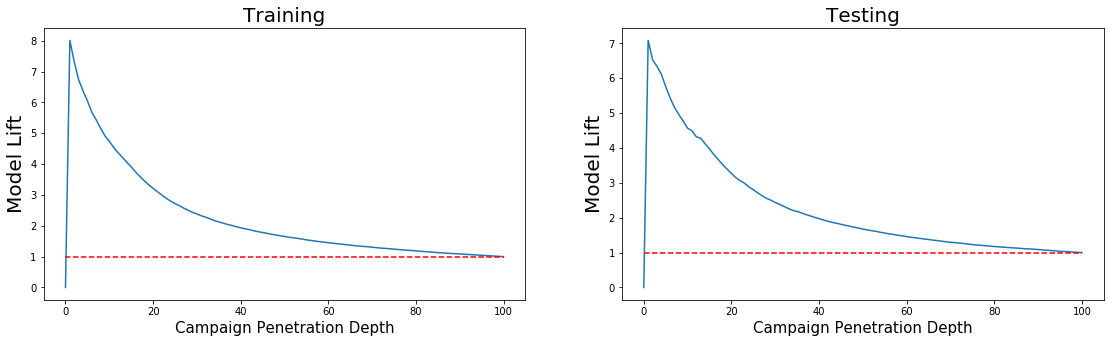

In [85]:
fig, (ax, ax1) = plt.subplots(nrows = 1, ncols = 2, figsize = (19,5))

ax.plot(lift_trn['bin'], lift_trn['cum lift'])
ax.plot([0, 100], [1, 1],'r--')
ax.set_title('Training',fontsize=20)
ax.set_ylabel('Model Lift',fontsize=20)
ax.set_xlabel('Campaign Penetration Depth',fontsize=15)

ax1.plot(lift_tst['bin'], lift_tst['cum lift'])
ax1.plot([0, 100], [1, 1],'r--')
ax1.set_title('Testing',fontsize=20)
ax1.set_ylabel('Model Lift',fontsize=20)
ax1.set_xlabel('Campaign Penetration Depth',fontsize=15)

Text(0.5, 0, 'Campaign Penetration Depth')

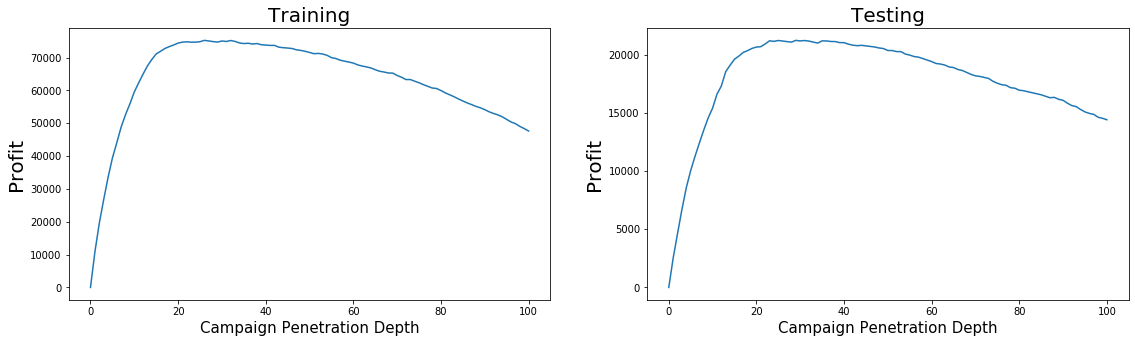

In [86]:
fig, (ax, ax1) = plt.subplots(nrows = 1, ncols = 2, figsize = (19,5))

ax.plot(lift_trn['bin'], lift_trn['profit'])
ax.set_title('Training',fontsize=20)
ax.set_ylabel('Profit',fontsize=20)
ax.set_xlabel('Campaign Penetration Depth',fontsize=15)

ax1.plot(lift_tst['bin'], lift_tst['profit'])
ax1.set_title('Testing',fontsize=20)
ax1.set_ylabel('Profit',fontsize=20)
ax1.set_xlabel('Campaign Penetration Depth',fontsize=15)

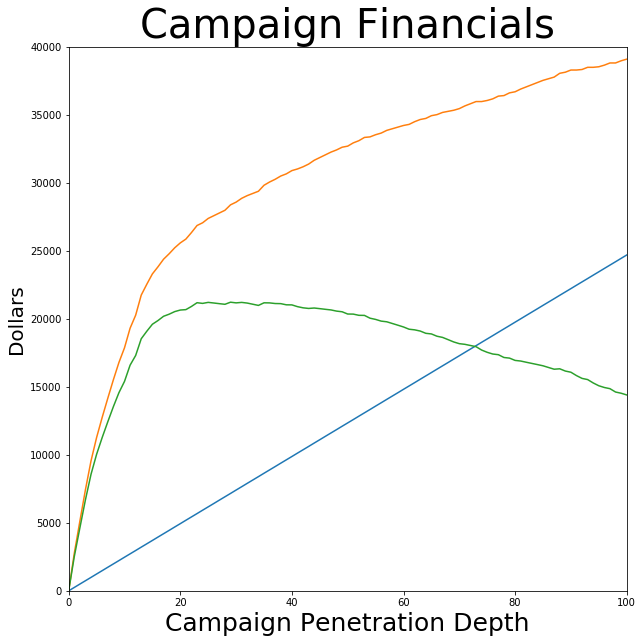

In [87]:
fig, ax = plt.subplots(figsize = (10,10))

ax.plot(lift_tst['bin'], lift_tst['cost'])
ax.plot(lift_tst['bin'], lift_tst['revenue'])
ax.plot(lift_tst['bin'], lift_tst['profit'])
# ax.plot(lift_tst['bin'], lift_tst['cum lift'])
# ax.plot([0, 100], [1, 1],'r--')
ax.set_title('Campaign Financials',fontsize=40)
ax.set_ylabel('Dollars',fontsize=20)
# ax.set_title('Model Lift',fontsize=40)
ax.set_xlabel('Campaign Penetration Depth',fontsize=25)
ax.set_xlim(0,100)
ax.set_ylim(0,40000)
plt.savefig('financials.png')
# plt.savefig('lift curve.png')

In [88]:
print('Model is', col_eval, '   Max profit is',lift_profit_tst_max, '   Lift in the ',lift_bin,'th bin is', lift_tst.loc[lift_bin,'cum lift'])

Model is gbdt    Max profit is 21236.0    Lift in the  20 th bin is 3.272380966571184


In [89]:
print('Notebook duration: ',datetime.now() - start_time)

Notebook duration:  0:15:23.992048
